# Data Preprocessing 

In [74]:
# Data Processing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Engineering:
# Normalize the training dataset since LSTM uses lots of Sigmoid function

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timestamps and 1 output
# 60 timestamp = 60 Financial Date ~ 3 Months
X_train = np.array( [ training_set_scaled[i-60:i, 0] for i in range(60, int(training_set.shape[0])) ])
y_train = np.array( [ training_set_scaled[i, 0] for i in range(60, int(training_set.shape[0])) ])

# Reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1) )

# Building RNN with Keras and ChatGPT

In [5]:
# The following code is generated by ChatGPT !!

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Define the LSTM model with dropout
model = Sequential()

# The first LSTM Layer
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM Layer
model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.2))

# Final LSTM Layer
model.add(LSTM(units=64))
model.add(Dropout(0.2))

# The purpose of using model.add(Dense(units=1)) in a Keras model with LSTM layers is to add a fully connected layer
# with one neuron (or unit) at the end of the model to produce a single output value.
model.add(Dense(units=1))

Metal device set to: Apple M1 Max


In [6]:
# Compile the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 1s 29ms/step - loss: 4.1225e-04
Epoch 2/100
38/38 [==============================] - 1s 29ms/step - loss: 5.3056e-04
Epoch 3/100
38/38 [==============================] - 1s 29ms/step - loss: 4.5611e-04
Epoch 4/100
38/38 [==============================] - 1s 30ms/step - loss: 5.2564e-04
Epoch 5/100
38/38 [==============================] - 1s 29ms/step - loss: 4.6369e-04
Epoch 6/100
38/38 [==============================] - 1s 30ms/step - loss: 3.9994e-04
Epoch 7/100
38/38 [==============================] - 1s 29ms/step - loss: 5.7437e-04
Epoch 8/100
38/38 [==============================] - 1s 29ms/step - loss: 4.0404e-04
Epoch 9/100
38/38 [==============================] - 1s 29ms/step - loss: 4.1096e-04
Epoch 10/100
38/38 [==============================] - 1s 30ms/step - loss: 4.1824e-04
Epoch 11/100
38/38 [==============================] - 1s 30ms/step - loss: 3.7871e-04
Epoch 12/100
38/38 [==============================] - 1s 30ms/s

# Import Real Stock Price Data as Testset

In [70]:
# Import Data 
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [60]:
real_stock_price = dataset_test.iloc[:, 1:2]
real_stock_price.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


Text(0, 0.5, 'Stock Price')

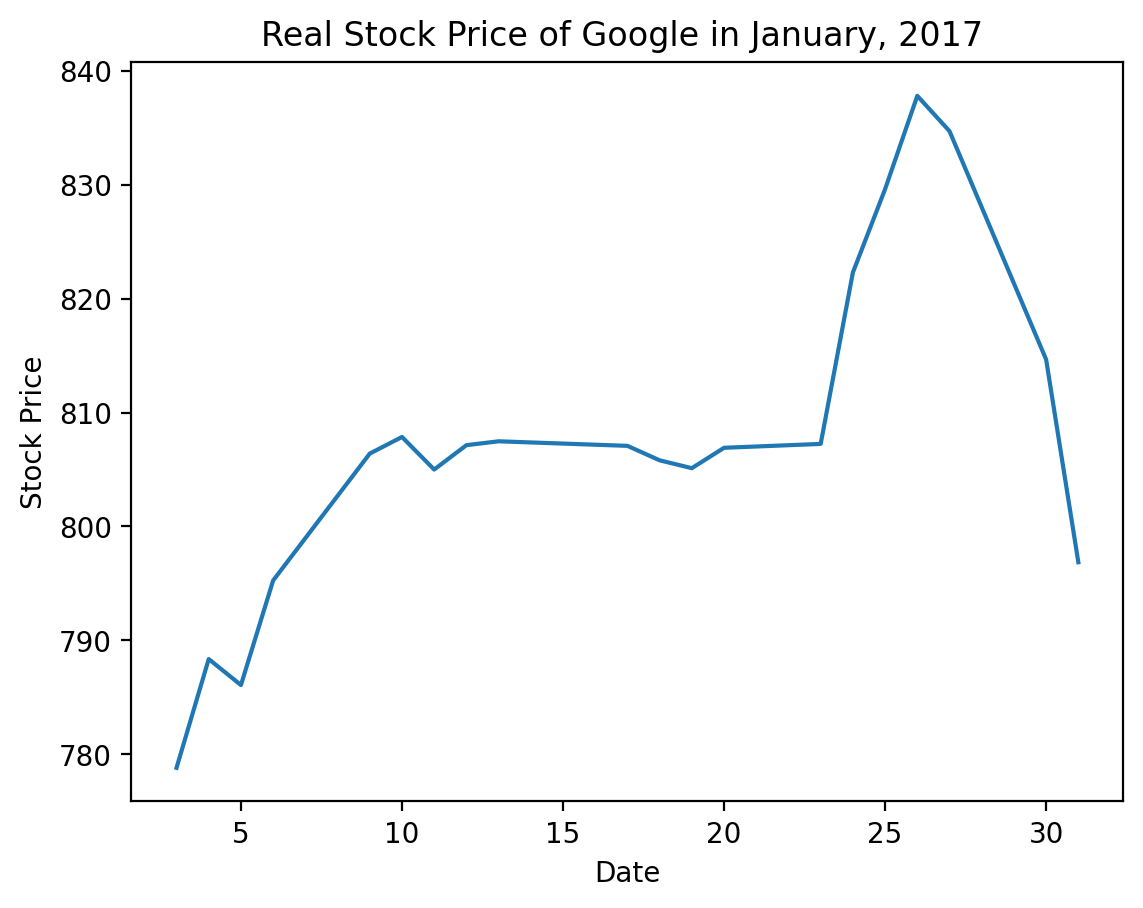

In [75]:
dataset_test['Date'] = pd.to_datetime(dataset_test['Date'], format='%m/%d/%Y')
plt.plot(dataset_test["Date"].dt.day, dataset_test["Open"])

plt.title('Real Stock Price of Google in January, 2017 ')
plt.xlabel('Date')
plt.ylabel('Stock Price')

In [62]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [63]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60: ].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [64]:
inputs.shape

(80,)

In [65]:
inputs_scaled = sc.transform(inputs.reshape(-1,1)) # reshape to column vector and normalize the data

In [66]:
X_test = np.array( [ inputs_scaled[i-60:i, 0] for i in range(60, int(inputs_scaled.shape[0])) ])

# Stock Price Prediction 

In [67]:
predicted_price = model.predict(X_test)

1/1 [==============================] - 0s 24ms/step


In [68]:
# Inverse transform to the original stock price scale 
predicted_price = sc.inverse_transform(predicted_price)
predicted_price 

array([[772.0274 ],
       [768.9117 ],
       [777.4626 ],
       [774.77673],
       [782.43506],
       [791.2354 ],
       [792.1347 ],
       [789.0238 ],
       [791.3089 ],
       [792.1523 ],
       [792.03815],
       [790.9675 ],
       [790.8017 ],
       [792.637  ],
       [793.01483],
       [805.82404],
       [811.03796],
       [817.4086 ],
       [813.7956 ],
       [797.7439 ]], dtype=float32)

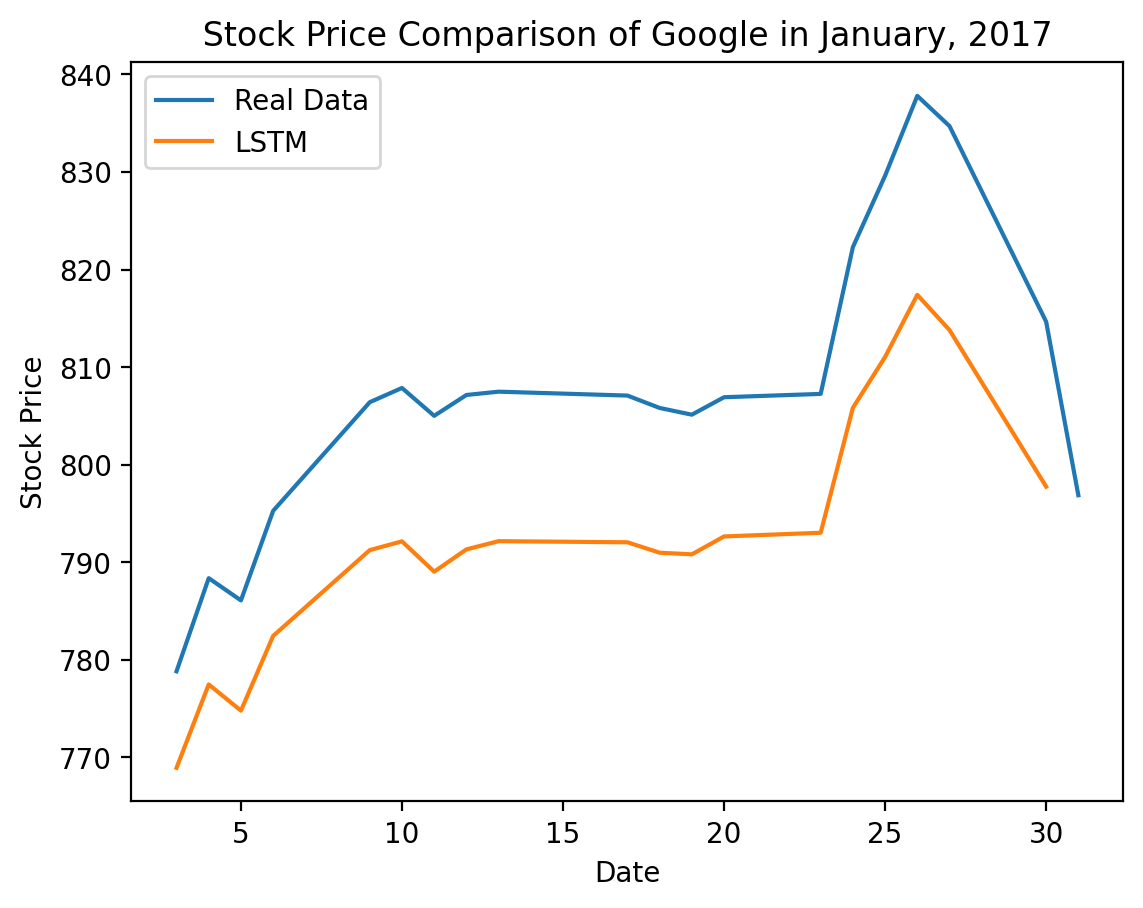

In [87]:
plt.title(' Stock Price Comparison of Google in January, 2017 ')
plt.xlabel('Date')
plt.ylabel('Stock Price')


plt.plot(dataset_test["Date"].dt.day, dataset_test["Open"], label='Real Data')
plt.plot(dataset_test["Date"].dt.day[:-1], predicted_price[1:], label='LSTM')
plt.legend()

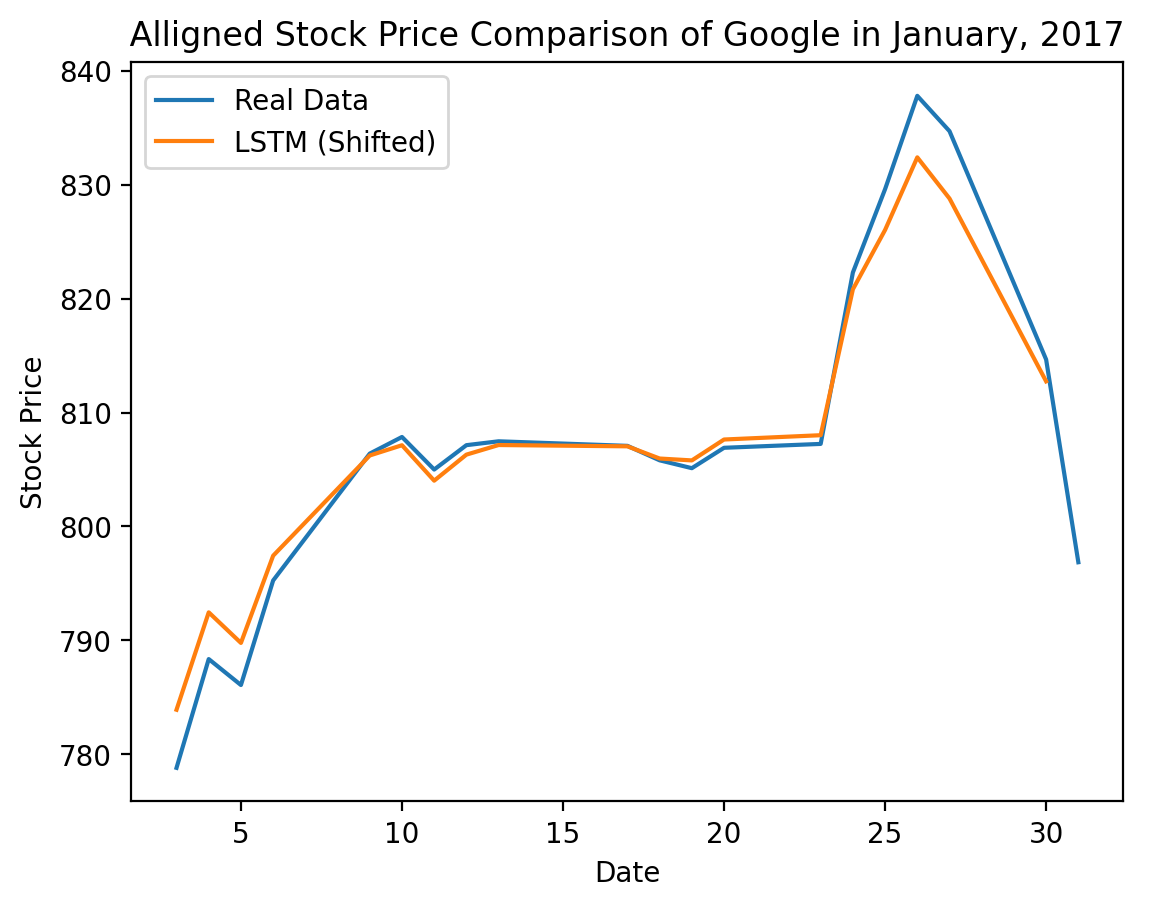

In [91]:
plt.title(' Alligned Stock Price Comparison of Google in January, 2017 ')
plt.xlabel('Date')
plt.ylabel('Stock Price')


plt.plot(dataset_test["Date"].dt.day, dataset_test["Open"], label='Real Data')
plt.plot(dataset_test["Date"].dt.day[:-1], predicted_price[1:]+15, label='LSTM (Shifted)')
plt.legend()
plt.savefig('prediction.pdf')

In [81]:
np.norm( predicted_price

array([[772.0274 ],
       [768.9117 ],
       [777.4626 ],
       [774.77673],
       [782.43506],
       [791.2354 ],
       [792.1347 ],
       [789.0238 ],
       [791.3089 ],
       [792.1523 ],
       [792.03815],
       [790.9675 ],
       [790.8017 ],
       [792.637  ],
       [793.01483],
       [805.82404],
       [811.03796],
       [817.4086 ],
       [813.7956 ],
       [797.7439 ]], dtype=float32)